# USE CASE - GIVE ME SOME CREDIT...
### DARSHAN SHIRSATH (22091047)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('credit.csv')
print(df.shape)
df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
df = df[(df['MonthlyIncome']!= 0) & (df['age']!=0) & (df['MonthlyIncome']!=1)&(df['MonthlyIncome']!=2)]
df.shape

(147754, 12)

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True) #droping Unnamed column from the data frame

In [7]:
df['MonthlyIncome'].mean(skipna=True)

6797.100743075503

In [8]:
df['MonthlyIncome'].median(skipna=True)

5479.0

Here we can see that the difference between the mean and median is 1318. So we will replace the null values of MonthlyIncome column by 6000(middle most value between mean and median)

In [9]:
df['MonthlyIncome'].fillna(6000,inplace=True)

Also to fill missing values of NumberOfDependents variable we will use mode and which is 0

In [10]:
df['NumberOfDependents'].fillna(0,inplace=True)

In [11]:
df.info() # Info tells us that there is no missing value in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147754 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      147754 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  147754 non-null  float64
 2   age                                   147754 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  147754 non-null  int64  
 4   DebtRatio                             147754 non-null  float64
 5   MonthlyIncome                         147754 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       147754 non-null  int64  
 7   NumberOfTimes90DaysLate               147754 non-null  int64  
 8   NumberRealEstateLoansOrLines          147754 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  147754 non-null  int64  
 10  NumberOfDependents                    147754 non-null  float64
dtype

C:\Users\DARSH01\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

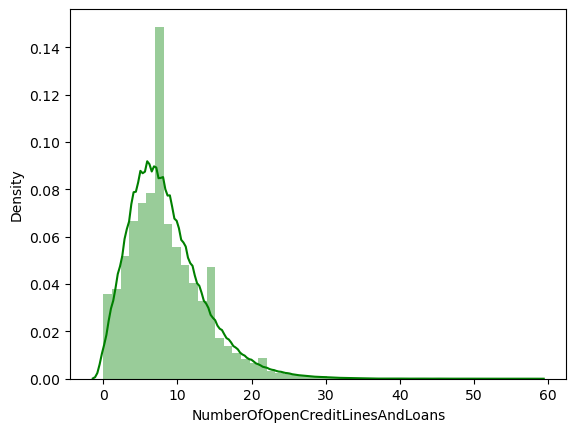

In [12]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'],color='g') # Distribution plot of Number Of Open Credit Lines And Loans

<AxesSubplot:xlabel='MonthlyIncome'>

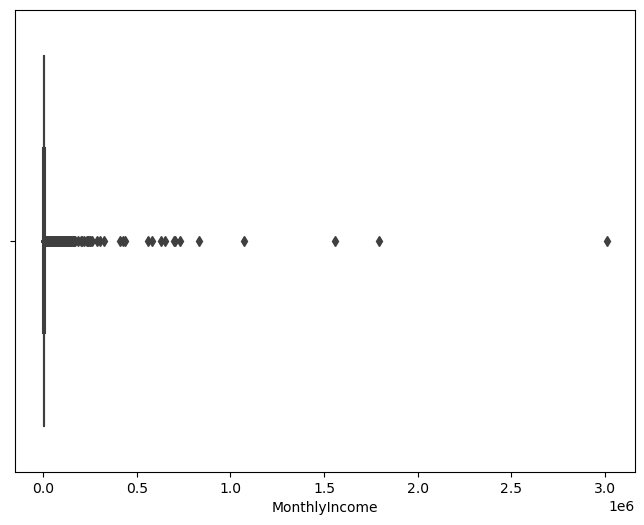

In [13]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x=df['MonthlyIncome'])

As the boxplot is not giving us the proper insight of the distribution of Monthly Income so we can use *LOG TRANSFORM* to get an overview of distribution

Text(0.5, 1.0, 'Boxplot of Log-Transformed Monthly Income')

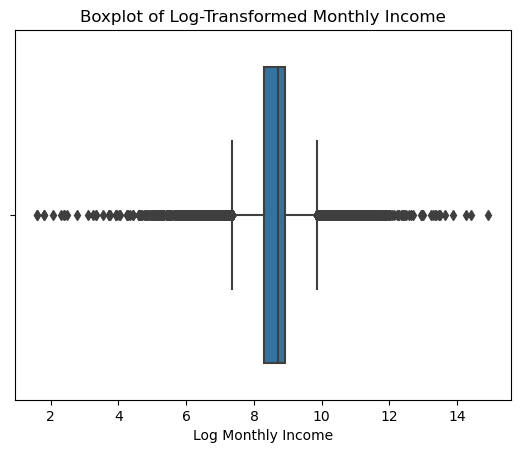

In [14]:
df['LogMonthlyIncome'] = np.log1p(df['MonthlyIncome'])

sns.boxplot(x=df['LogMonthlyIncome'])

plt.xlabel('Log Monthly Income')
plt.title('Boxplot of Log-Transformed Monthly Income')

* By looking at the we see that there so many outliers which are affecting the distribution.
* Now by using PERCENTILES we can drop the outliers and see the distribution.

In [15]:
percentile_25 = np.percentile( df['MonthlyIncome'],1)
median = np.percentile( df['MonthlyIncome'], 50)
percentile_75 = np.percentile( df['MonthlyIncome'], 97)

print("25th Percentile:", percentile_25)
print("Median (50th Percentile):", median)
print("75th Percentile:", percentile_75)

25th Percentile: 820.0
Median (50th Percentile): 6000.0
75th Percentile: 16000.0


In [16]:
percentile_97 = df['MonthlyIncome'].quantile(0.97)
filtered_df = df[df['MonthlyIncome'] <= percentile_97]

#### Now our data has been filtered by removing ouliers 
Now we can plot the distribution of *Monthly Income*.

C:\Users\DARSH01\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

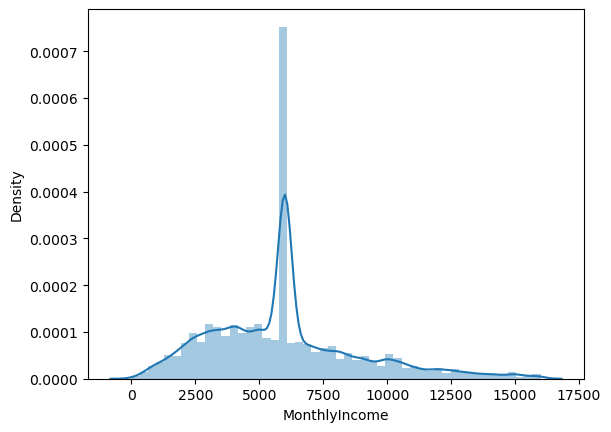

In [17]:
sns.distplot(filtered_df['MonthlyIncome'])

In [18]:
filtered_df['SeriousDlqin2yrs'].value_counts()

0    133668
1      9734
Name: SeriousDlqin2yrs, dtype: int64

#### This classification shows that our dataset is imbalanced and that will be make our model *'bias'* toward the non-delinquency.
So to balance the dataset and to make better model for prediction we will use the *Resampling (Oversampling and Undersampling) technique*.

* This technique is used to upsample or downsample the minority or majority class. When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.

In [19]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = filtered_df[(filtered_df['SeriousDlqin2yrs']==0)] 
df_minority = filtered_df[(filtered_df['SeriousDlqin2yrs']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 133668, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
balanced_df =  df_upsampled  

In [20]:
balanced_df.shape

(267336, 12)

#### Now our dataset has become balanced dataset so that we can fit models
### 1. Logistics Regression

In [21]:
X = balanced_df.drop('SeriousDlqin2yrs', axis=1)
y = balanced_df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\DARSH01\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72     40415
           1       0.72      0.69      0.70     39786

    accuracy                           0.71     80201
   macro avg       0.71      0.71      0.71     80201
weighted avg       0.71      0.71      0.71     80201



[[29522 10893]
 [12413 27373]]


The Logistic Regression Model gives an accuracy of 71%. Now we see the accuracy by using *Random Forest Classifier*.

### 2. Random Forest Classifier 

In [24]:
rf_classifier = RandomForestClassifier(max_depth=5,max_features=0.3,max_samples=0.9)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.3, max_samples=0.9)

In [25]:
y_pred = rf_classifier.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     40415
           1       0.78      0.80      0.79     39786

    accuracy                           0.78     80201
   macro avg       0.79      0.79      0.78     80201
weighted avg       0.79      0.78      0.78     80201



[[31297  9118]
 [ 8130 31656]]


##### Classification Report shows us that model predicting 78% accurate result.

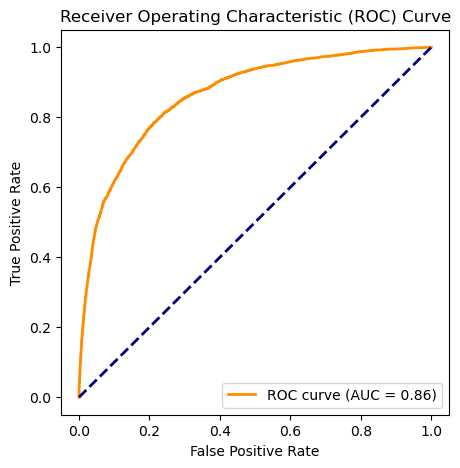

In [27]:
y_proba = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_curve = auc(fpr, tpr)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

More the AUC more the accuracy. And here the value is near about 0.86 which suggets that our model is better performer.